In [9]:
from statsmodels.tsa.arima_model import ARMA
from random import random
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import pandas as pd
import math

In [20]:
newFile="MHmodified.csv"
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m/%d')
df1 = pd.read_csv(newFile)
df1.head()

,MU,period
0,120.0,2013/4/1
1,122.0,2013/4/2
2,113.7,2013/4/3
3,122.7,2013/4/4
4,122.2,2013/4/5


In [21]:
X = df1['MU']

In [22]:
train= X[0:1446]
test=X[1446:]

In [23]:
y=[]
error1=100
index=-1
for i in range (0,24):    
    model = ARMA(train, order=(i, 1))
    model_fit = model.fit(disp=True)
    yhat = model_fit.predict(1446,1446+len(test)-1)
    yhat=list(yhat)
    error = math.sqrt(mean_squared_error(test, yhat))
    if error<error1:
        error1=error
        index=i
        y=yhat
    print('Test RMSE for ',i,': %.3f' % error,)

Test RMSE for  0 : 22.234
Test RMSE for  1 : 20.828
Test RMSE for  2 : 20.719
Test RMSE for  3 : 20.782
Test RMSE for  4 : 19.645
Test RMSE for  5 : 20.361
Test RMSE for  6 : 19.854
Test RMSE for  7 : 19.818
Test RMSE for  8 : 19.944
Test RMSE for  9 : 19.949
Test RMSE for  10 : 20.001
Test RMSE for  11 : 20.065
Test RMSE for  12 : 19.786
Test RMSE for  13 : 19.776
Test RMSE for  14 : 19.755
Test RMSE for  15 : 19.849
Test RMSE for  16 : 18.575
Test RMSE for  17 : 18.573
Test RMSE for  18 : 18.564
Test RMSE for  19 : 18.560
Test RMSE for  20 : 18.540
Test RMSE for  21 : 19.098
Test RMSE for  22 : 19.080
Test RMSE for  23 : 18.496


<Figure size 1600x1200 with 0 Axes>

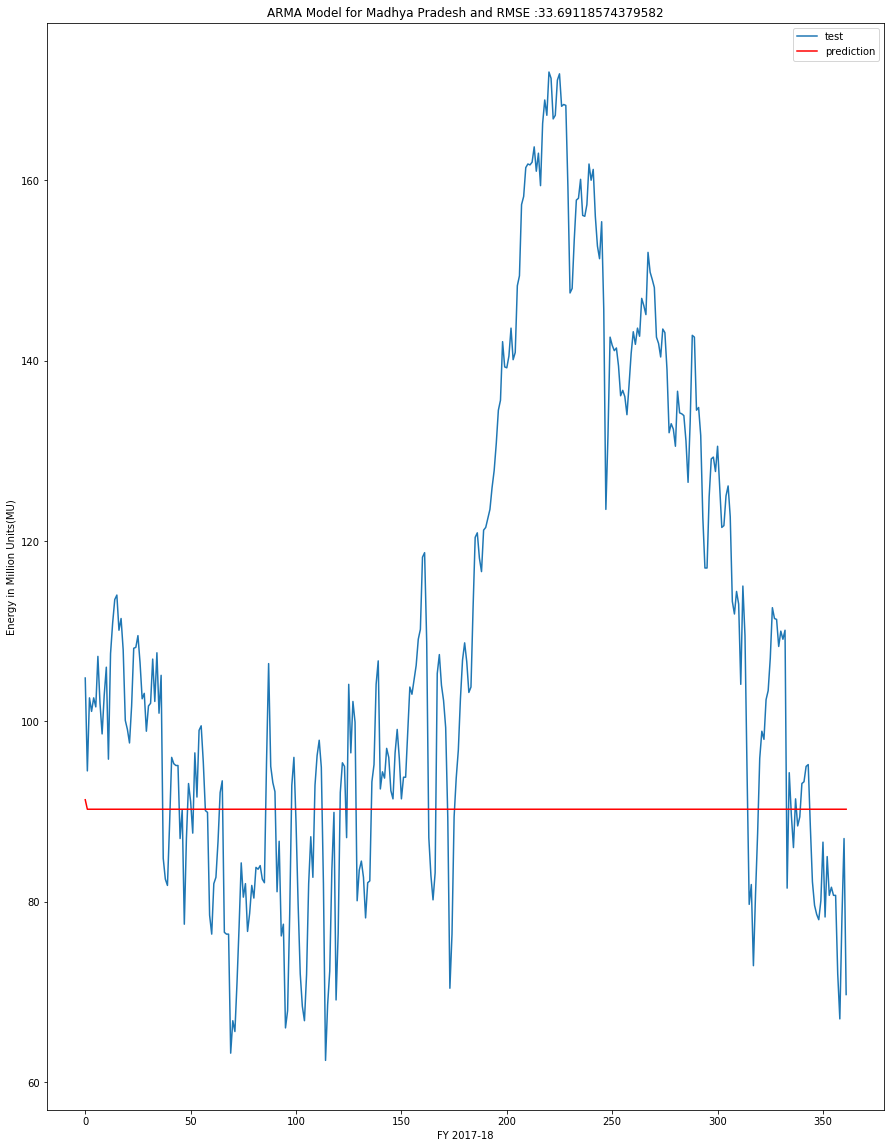

In [19]:
x=[i for i in range(len(test))]
figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
pyplot.figure(figsize=(15,20))
pyplot.plot(x,list(test),label='test')

pyplot.plot(x,list(y), color='red',label='prediction')
pyplot.legend()
pyplot.title("ARMA Model for Madhya Pradesh and RMSE :"+ str(error))
pyplot.xlabel('FY 2017-18')
pyplot.ylabel('Energy in Million Units(MU)')
pyplot.show()